In [1]:
from sklearn.datasets import make_moons 

X_array, y_array = make_moons(noise = 0.5, n_samples=50, random_state=3)

In [2]:
import numpy as np
import pandas as pd

# Transformation der Merkmalswerte in einen positiven Bereich und 
# Umwandlung in eine Integer-Matrix
X_array = X_array + 1.2 * np.abs(np.min(X_array))
X_array = X_array + 1.2 * np.abs(np.min(X_array))
X_array[:,0] = np.ceil(X_array[:,0] * 30000)
X_array[:,1] = np.ceil(X_array[:,1] * 10000)
X = pd.DataFrame(X_array, columns=['Kilometerstand [km]', 'Preis [EUR]'], dtype=(int, int))

# Zuweisung von True/False basierend auf den Kategorien 1 bzw. 0
y_array = (y_array - 1.0) * (-1)
y = pd.Series(y_array, name='verkauft', dtype='bool')

In [3]:
import plotly.express as px

fig = px.scatter(x = X['Kilometerstand [km]'], y = X['Preis [EUR]'], color=y,
    title='Künstliche Daten Autohaus',
    labels={'x': 'Kilometerstand [km]', 'y': 'Preis [EUR]', 'color': 'verkauft'})
fig.show()

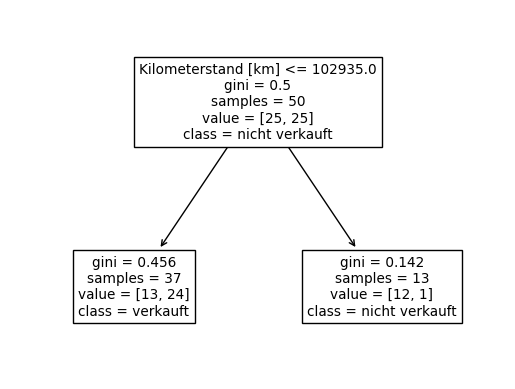

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

modell_tiefe1 = DecisionTreeClassifier(random_state=0, max_depth=1)
modell_tiefe1.fit(X,y)

plot_tree(modell_tiefe1,
    feature_names=['Kilometerstand [km]', 'Preis [EUR]'],
    class_names=['nicht verkauft', 'verkauft']);

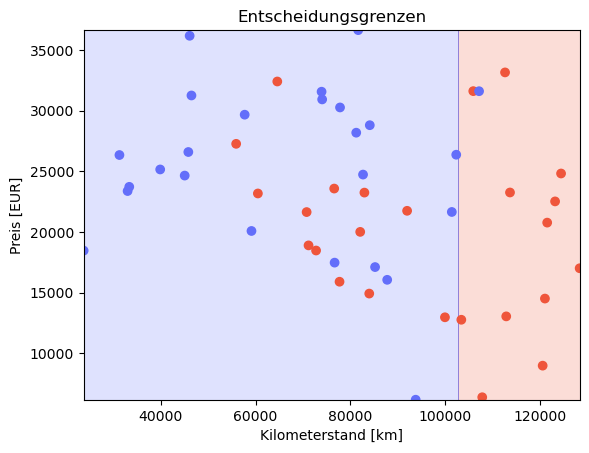

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

fig = DecisionBoundaryDisplay.from_estimator(modell_tiefe1, X, cmap=ListedColormap(['#EF553B33', '#636EFA33']), grid_resolution=1000)
fig.ax_.scatter(X['Kilometerstand [km]'], X['Preis [EUR]'], c=y, cmap=ListedColormap(['#EF553B', '#636EFA']))
fig.ax_.set_title('Entscheidungsgrenzen');